# Logistic regression in scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,5
%matplotlib inline

In [14]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [15]:
test_size=0.3
random_state=0
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=random_state)

In [16]:
scalar_class=StandardScaler()
# fit the scalar to the training feature set ONLY
scalar_class.fit(x_train)
x_train_std=scalar_class.transform(x_train)
x_test_std=scalar_class.transform(x_test)

In [17]:
x_train_std=x_train_std[:,[2,3]]
x_test_std=x_test_std[:,[2,3]]

In [18]:
c=1000
random_state=0
lr=LogisticRegression(C=c,random_state=random_state)

In [19]:
lr.fit(x_train_std,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
test_sample=x_test_std[1,:].copy().reshape(1,-1)
probs=lr.predict_proba(test_sample)
iris_label_dict={0:'Setosa',1:'Versicolor',2:'Virginia'}
class_name=iris_label_dict
class_number=lr.classes_
probability=probs[0]
for i,_ in enumerate(lr.classes_):
    print("{0} [{1}]:{2:.3f}".format(class_name[i],class_number[i],probability[i]*100))

Setosa [0]:0.061
Versicolor [1]:99.929
Virginia [2]:0.011


In [25]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [26]:



def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

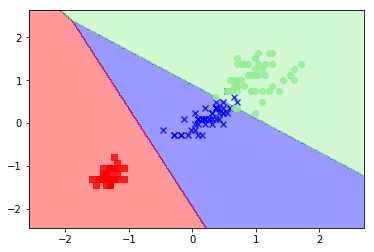

In [28]:
x_combined=np.vstack((x_train_std,x_test_std))
y_combine=np.hstack((y_train,y_test))
x=x_combined
y=y_combine
classifier=lr
test_idx=range(105,150)
plot_decision_regions(X=x,y=y,classifier=classifier,test_idx=test_idx)


## You can see that it did better than Perceptron learning algorithm but still there isnt a large margin between the classifications of Blue and light green zone and we can make it better using SVM.